## Final Project Submission

Please fill out:
* Student name: Ingavi Kilavuka
* Student pace: full time
* Scheduled project review date/time:
* Instructor name: Mwikali 
* Blog post URL:


## Overview  

I used movie data from box office revenue (worldwide and domestic), production budget, genre, ratings and runtime. Our target is to establish which of these variable correlate to a more successful movie, this can help inform microsoft on what how best to make a movie that can earn alot of money 

## Business Understanding
Microsoft would like to move into the movie industry as they can see other companies thriving. 
They are in need of assitance to know what type of movies do well at the box office.



## Data Understanding




Firstly, we begin by importing all important python libraries and files

In [215]:
#imported neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 

In [216]:
# Imported the CSV files
Bom_movies = pd.read_csv(r"C:\Users\HomePC\Documents\Flatiron\course_materials\Phase_01\dsc-phase-1-project-v2-4\zippedData\bom.movie_gross.csv.gz")
movie_info = pd.read_csv(r"C:\Users\HomePC\Documents\Flatiron\course_materials\Phase_01\dsc-phase-1-project-v2-4\zippedData\rt.movie_info.tsv.gz", sep='\t')
TMDB_movies = pd.read_csv(r"C:\Users\HomePC\Documents\Flatiron\course_materials\Phase_01\dsc-phase-1-project-v2-4\zippedData\tmdb.movies.csv.gz")
movie_budgets = pd.read_csv(r"C:\Users\HomePC\Documents\Flatiron\course_materials\Phase_01\dsc-phase-1-project-v2-4\zippedData\tn.movie_budgets.csv.gz")

 Next, we need to get the size and information on each dataset. This is important because it will help us pick the datasets that can best fit our goal.

In [217]:
# Getting the size of of Bom movies data 
Bom_movies = pd.read_csv(r"C:\Users\HomePC\Documents\Flatiron\course_materials\Phase_01\dsc-phase-1-project-v2-4\zippedData\bom.movie_gross.csv.gz")
num_rows, num_columns = bom_movies.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

#To mulptiply both rows and columns to gauge an understanding of how many elements we are dealing with
Multiplied_elements = num_rows * num_columns
print("All elements:", Multiplied_elements)
print("Data information:", bom_movies.info) 

Number of rows: 3387
Number of columns: 5
All elements: 16935
Data information: <bound method DataFrame.info of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0 

In [218]:
#Getting the size of of TMDB movies data 
TMDB_movies = pd.read_csv(r"C:\Users\HomePC\Documents\Flatiron\course_materials\Phase_01\dsc-phase-1-project-v2-4\zippedData\tmdb.movies.csv.gz")
num_rows, num_columns = TMDB_movies.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

#To mulptiply both rows and columns to gauge an understanding of how many elements we are dealing with
Multiplied_elements = num_rows * num_columns
print("All elements:", Multiplied_elements) 
print("Data information:", TMDB_movies.info)

Number of rows: 26517
Number of columns: 10
All elements: 265170
Data information: <bound method DataFrame.info of        Unnamed: 0            genre_ids      id original_language  \
0               0      [12, 14, 10751]   12444                en   
1               1  [14, 12, 16, 10751]   10191                en   
2               2        [12, 28, 878]   10138                en   
3               3      [16, 35, 10751]     862                en   
4               4        [28, 878, 12]   27205                en   
...           ...                  ...     ...               ...   
26512       26512             [27, 18]  488143                en   
26513       26513             [18, 53]  485975                en   
26514       26514         [14, 28, 12]  381231                en   
26515       26515      [10751, 12, 28]  366854                en   
26516       26516             [53, 27]  309885                en   

                                     original_title  popularity rele

In [219]:
#Getting the size of of movie_info data 
movie_info = pd.read_csv(r"C:\Users\HomePC\Documents\Flatiron\course_materials\Phase_01\dsc-phase-1-project-v2-4\zippedData\rt.movie_info.tsv.gz", sep='\t')
num_rows, num_columns = movie_info.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

#To mulptiply both rows and columns to gauge an understanding of how many elements we are dealing with
Multiplied_elements = num_rows * num_columns
print("All elements:", Multiplied_elements) 
print("Data information:", movie_info.info)

Number of rows: 1560
Number of columns: 12
All elements: 18720
Data information: <bound method DataFrame.info of         id                                           synopsis rating  \
0        1  This gritty, fast-paced, and innovative police...      R   
1        3  New York City, not-too-distant-future: Eric Pa...      R   
2        5  Illeana Douglas delivers a superb performance ...      R   
3        6  Michael Douglas runs afoul of a treacherous su...      R   
4        7                                                NaN     NR   
...    ...                                                ...    ...   
1555  1996  Forget terrorists or hijackers -- there's a ha...      R   
1556  1997  The popular Saturday Night Live sketch was exp...     PG   
1557  1998  Based on a novel by Richard Powell, when the l...      G   
1558  1999  The Sandlot is a coming-of-age story about a g...     PG   
1559  2000  Suspended from the force, Paris cop Hubert is ...      R   

                      

In [220]:
# Getting the size of of movie_budgets data 
movie_budgets = pd.read_csv(r"C:\Users\HomePC\Documents\Flatiron\course_materials\Phase_01\dsc-phase-1-project-v2-4\zippedData\tn.movie_budgets.csv.gz")
num_rows, num_columns = movie_budgets.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

#We mulptiply both rows and columns to gauge an understanding of how many elements we are dealing with
Multiplied_elements = num_rows * num_columns
print("All elements:", Multiplied_elements) 
print("Data information:", movie_budgets.info)

Number of rows: 5782
Number of columns: 6
All elements: 34692
Data information: <bound method DataFrame.info of       id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gro

Above we can see that the 'movie_budgets', 'TMD_movies' and 'movie_info' are the top 3 while Bom_movies come last
Now while the amount of data is important for reliability, what the data says is just as, if not more important as it will be easier to accomplish what we have set out to do.
So we must qualitatively decide which datasets to pick ou

In [221]:
#This column information helps us decide qualitatively which datasets has information that we need and those that are not as useful
print('Columns_for_movies_budget:', movie_budgets.columns) 
print('Columns_for_Bom_movies:', Bom_movies.columns) 
print('Columns_for_movie_info:', movie_info.columns) 
print('Columns_for_TMDB:', TMDB_movies.columns)

Columns_for_movies_budget: Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')
Columns_for_Bom_movies: Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
Columns_for_movie_info: Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')
Columns_for_TMDB: Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


The best data sets to use will be:
- Movie_budgets as it gives use both domestic and worldwide gross, as well as the movie budget
- Movies_info as it gives use the runtime, age rating as well as the genre of the movie
- Bom_movies can be used to see which studio does best at the box office 
Though 'TMDB' HAD alot more data the was no highly distiguishing variable to measure a likely hood of success. It does not provide a genre, age rating, runtime, budget. Only the date, which I beleive is not strong enough of a reason to contribute to a films success

we will be seeing if the studio, runtime or budget affects the success of a movie

*DESCRIBE THE LIMITATIONS OF THE DATA

## Data preparation 
In this section, we clean the data, removing rows with missing values, adding median values to a few missing rows, making any strings that are numerical into floats or integers

### DATA CLEANING

In [222]:
#Cleaning the bom.movie_gross.csv
#Drop rows with missing values in the 'studio' column
Bom_movies.dropna(subset=['studio'], inplace=True)

#We fill missing values in 'domestic_gross' with the median
Bom_movies['domestic_gross'].fillna(Bom_movies['domestic_gross'].median(), inplace=True)

#We convert 'foreign_gross' to numeric and fill missing values with 0
Bom_movies['foreign_gross'] = pd.to_numeric(Bom_movies['foreign_gross'], errors='coerce').fillna(0)

#adding both domestic and foreign gross inorder to have the total amount earned from each movie
Bom_movies['total_gross'] = Bom_movies['foreign_gross'] + Bom_movies['domestic_gross']




In [223]:
Bom_movies.to_csv('clean_movie_budgets.csv', index=False)
clean_Bom_movies = pd.read_csv('clean_movie_budgets.csv')
clean_Bom_movies

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3377,The Quake,Magn.,6200.0,0.0,2018,6.200000e+03
3378,Edward II (2018 re-release),FM,4800.0,0.0,2018,4.800000e+03
3379,El Pacto,Sony,2500.0,0.0,2018,2.500000e+03
3380,The Swan,Synergetic,2400.0,0.0,2018,2.400000e+03


In [224]:
# Remove duplicates
movie_budgets.drop_duplicates(inplace=True)

#removing the columns tht have 0 as they do not fit into the criteria 
clean_movie_budgets = (movie_budgets['domestic_gross'] != 0) & (movie_budgets['worldwide_gross'] != 0)

# Apply the condition to filter the DataFrame
movie_budgets = movie_budgets[clean_movie_budgets]

#Summing foreign and domestic gross
movie_budgets['total_gross'] = movie_budgets['worldwide_gross'] + movie_budgets['domestic_gross']

In [225]:
#converting all numericals from strings to floats to allow any neccessary mathematical operations to take place
#removing the dollar sign and commas to allow for any necessary mathematical operations

movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budgets['total_gross'] = movie_budgets['total_gross'].str.replace('$', '').str.replace(',', '').astype(float)

In [226]:
movie_budgets.to_csv('clean_movie_budgets.csv', index=False)
clean_movie_budgets = pd.read_csv('clean_movie_budgets.csv')
clean_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.776345e+18
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.045664e+18
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.497624e+16
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.403014e+18
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.316722e+18
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,2.404955e+10
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,1.338134e+07
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,0.000000e+00


In [227]:
movie_info['box_office'] = movie_info['box_office'].str.replace(',', '').astype(float)

In [228]:
#Ordered the Dataframe based from highest to lowest
movie_info_sorted = movie_info.sort_values(by='box_office', ascending=False)

# Removed columns 'synopsis', 'writer', 'currency', 'director', 'dvd_date' from the sorted Data as they are irrelevant
columns_to_remove = ['synopsis', 'writer', 'currency', 'director', 'dvd_date']
movie_info_sorted.drop(columns=columns_to_remove, inplace=True)

movie_info = movie_info_sorted
print(movie_info)

        id rating                                              genre  \
827   1071      R                                              Drama   
877   1136  PG-13   Action and Adventure|Science Fiction and Fantasy   
1188  1525  PG-13          Action and Adventure|Mystery and Suspense   
690    883  PG-13                                             Comedy   
1117  1442     PG        Kids and Family|Science Fiction and Fantasy   
...    ...    ...                                                ...   
1554  1995  PG-13                Action and Adventure|Comedy|Western   
1556  1997     PG                 Comedy|Science Fiction and Fantasy   
1557  1998      G  Classics|Comedy|Drama|Musical and Performing Arts   
1558  1999     PG    Comedy|Drama|Kids and Family|Sports and Fitness   
1559  2000      R  Action and Adventure|Art House and Internation...   

      theater_date   box_office      runtime                 studio  
827   Feb 25, 2004  368000000.0  127 minutes   Newmarket Film Gro

In [232]:
#Converting 'runtime' to float
movie_info['runtime'] = movie_info['runtime'].str.replace(' minutes', '').astype(float)
#Converting 'box_office' to float
movie_info['box_office'] = movie_info['box_office'].astype(float)

In [233]:
movie_info.to_csv('clean_movie_budgets.csv', index=False)
clean_movie_info = pd.read_csv('clean_movie_budgets.csv')
clean_movie_info

,id,rating,genre,theater_date,box_office,runtime,studio
0,1071,R,Drama,"Feb 25, 2004",368000000.0,127.0,Newmarket Film Group
1,1136,PG-13,Action and Adventure|Science Fiction and Fantasy,"Dec 14, 2012",303001229.0,170.0,Warner Bros.
2,1525,PG-13,Action and Adventure|Mystery and Suspense,"Nov 9, 2012",299300000.0,145.0,MGM
3,883,PG-13,Comedy,"Dec 22, 2004",279167575.0,118.0,Universal Pictures
4,1442,PG,Kids and Family|Science Fiction and Fantasy,"Nov 15, 2002",261835892.0,161.0,Warner Bros. Pictures
...,...,...,...,...,...,...,...
1555,1995,PG-13,Action and Adventure|Comedy|Western,"Jun 30, 1999",NaN,107.0,Warner Bros. Pictures
1556,1997,PG,Comedy|Science Fiction and Fantasy,"Jul 23, 1993",NaN,88.0,Paramount Vantage
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,"Jan 1, 1962",NaN,111.0,NaN
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,"Apr 1, 1993",NaN,101.0,NaN


All files being used have been cleaned

# Data Analysis


In [235]:
#Calculating Pearson correlation coefficient for both 'movie_info' and 'movie_budgets'
movie_info_pearson_corr = movie_info['runtime'].corr(movie_info['box_office'])
print ('The Pearson correlation between runtime and gross is:', movie_info_pearson_corr)

budget_pearson_corr = movie_budgets['production_budget'].corr(movie_budgets['total_gross'])
print ('The Pearson correlation between budget and gross is:',budget_pearson_corr)

The Pearson correlation between runtime and gross is: 0.21995170240736545
The Pearson correlation between budget and gross is: 0.6711098549674701


In [236]:
# Calculate Spearman rank correlation coefficient
movie_info_spearman_corr = movie_info['runtime'].corr(movie_info['box_office'], method='spearman')
print ('The Spearman correlation between runtime and gross is:',movie_info_spearman_corr)

budgets_spearman_corr = movie_budgets['production_budget'].corr(movie_budgets['total_gross'], method='spearman')
print ('The Spearman correlation between budget and gross is:', budgets_spearman_corr)


The Spearman correlation between runtime and gross is: 0.170218625644249
The Spearman correlation between budget and gross is: 0.72791854688128


The correlations between runtime and gross are positive but not strong and therefore we can no with confidence say that runtime positively affects correlation as the relationship is very weak.

However the correlations between budget and gross are very strongly positive. Movies with bigger budgets tend to earn more money.


Now we want to see if which studio has the most success in making movies

In [237]:
#We begin by extracting the columns 'studio' and 'gross'
studio_gross = Bom_movies[['studio', 'total_gross']]

#Group by 'studio' and aggregate 'gross' to find total gross for each studio
studio_gross_total = Bom_movies.groupby('studio').sum()

#Sort by total gross in descending order and select top 5 studios
top_5_studios = studio_gross_total.nlargest(5, 'total_gross')

print(top_5_studios)

        domestic_gross  foreign_gross    year   total_gross
studio                                                     
BV        1.841903e+10   2.579385e+10  213451  4.421288e+10
Fox       1.094950e+10   2.005587e+10  273882  3.100537e+10
WB        1.216805e+10   1.866790e+10  281941  3.083595e+10
Uni.      1.290239e+10   1.685477e+10  296082  2.975716e+10
Sony      8.461083e+09   1.394535e+10  221575  2.240644e+10


From this analysis we can see that BV(Disney) is the highest earning studio by over a billion.

# Visualization

In this section we visualize the data inorder to make it readable and presentable at a glance 

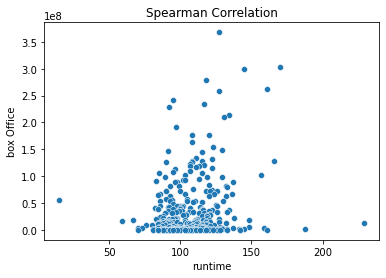

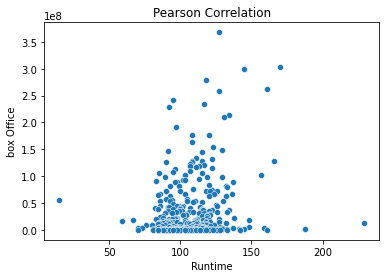

In [238]:
#Plotting Spearman correlation to see the relationship between run time and box office gross
sns.scatterplot(x='runtime', y='box_office', data=movie_info)
plt.title('Spearman Correlation')
plt.xlabel('runtime')
plt.ylabel('box Office')
plt.show()

# Plotting Pearson correlation to see the relationship between run time and box office gross
sns.scatterplot(x='runtime', y='box_office', data=movie_info)
plt.title('Pearson Correlation')
plt.xlabel('Runtime')
plt.ylabel('box Office')
plt.show()


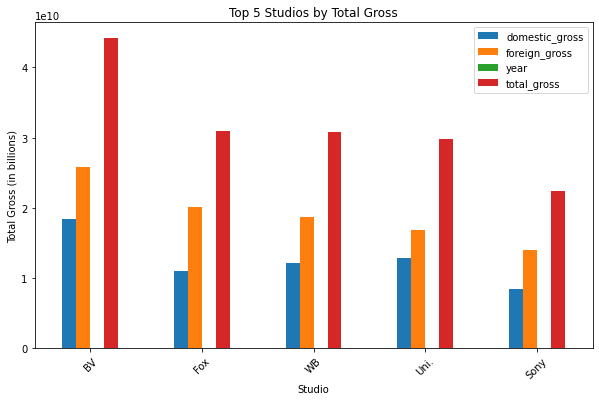

In [204]:
#Visualized bar graph to visualise the highest earning studios 
top_5_studios.plot(kind='bar', figsize=(10, 6))
plt.title('Top 5 Studios by Total Gross')
plt.xlabel('Studio')
plt.ylabel('Total Gross (in billions)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Your code here - remember to use markdown cells for comments as well!